In [ ]:
# Load and concatenate all CSV files in the folder into a single DataFrame
import glob
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
csv_files = glob.glob(os.path.join('.', '*.csv'))
print(f"Found {len(csv_files)} CSV files in the folder:")
for f in csv_files:
    print(' -', f)

if len(csv_files) == 0:
    print('No CSV files found in the current folder.')
else:
    dfs = []
    for f in csv_files:
        try:
            df = pd.read_csv(f)
        except Exception as e:
            print(f"Error reading {f}: {e}")
            continue
        # Add filename (without extension) to track the source
        df['archivo_origen'] = os.path.splitext(os.path.basename(f))[0]
        dfs.append(df)

    # Concatenate all DataFrames
    data = pd.concat(dfs, ignore_index=False)

    data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
    data.sort_values(by='Timestamp', inplace=True)

    # (Optional) Reset index after sorting
    data.reset_index(drop=True, inplace=True)
    data = data[data['Level_pct'] != 0]

    # Try to convert Timestamp column if it exists
    if 'Timestamp' in data.columns:
        try:
            data['Timestamp'] = pd.to_datetime(data['Timestamp'])
        except Exception as e:
            print('Could not convert "Timestamp" to datetime:', e)

    print('\nCombined data created:')
    print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")
    display(data.head())
    display(df.tail())
    # Saved in global variable `data` for compatibility with existing cells
    # If you prefer another name, tell me and I will change it.

Encontrados 11 archivos CSV en la carpeta:
 - .\manual_open_control_0pct.csv
 - .\manual_open_control_100pct.csv
 - .\manual_open_control_10pct.csv
 - .\manual_open_control_20pct.csv
 - .\manual_open_control_30pct.csv
 - .\manual_open_control_40pct.csv
 - .\manual_open_control_50pct.csv
 - .\manual_open_control_60pct.csv
 - .\manual_open_control_70pct.csv
 - .\manual_open_control_80pct.csv
 - .\manual_open_control_90pct.csv

Data combinada creada:
Filas: 321505, Columnas: 14


,Timestamp,Valve_Closure_pct,Level_pct,Is_Real_Measurement,Control_Signal_pct,Setpoint_pct,Error_pct,Kp,Ki,Kd,b1,a1,a2,archivo_origen
0,2025-07-08 13:35:55,100,0.784314,1,73.960784,10,9.215686,2.000000,0.100000,0.500000,0.706046,0.031833,0.276923,manual_open_control_0pct
1,2025-07-08 13:35:56,100,2.352941,1,66.196078,10,7.647059,2.000000,0.100000,0.500000,0.706046,-2.488556,-21.090275,manual_open_control_0pct
2,2025-07-08 13:35:57,100,3.529412,1,100.000000,10,6.470588,-411.815668,871.766022,815.139213,-0.030731,-2.465119,-21.090295,manual_open_control_0pct
3,2025-07-08 13:35:58,100,6.666667,1,100.000000,10,3.333333,4.696672,-3.670714,9.300151,0.267636,6.913134,-5.673742,manual_open_control_0pct
4,2025-07-08 13:35:59,100,9.803922,1,49.065713,10,0.196078,16.094148,-30.453388,-114.687299,0.053182,0.172017,-1.595740,manual_open_control_0pct


,Timestamp,Valve_Closure_pct,Level_pct,Is_Real_Measurement,Control_Signal_pct,Setpoint_pct,Error_pct,Kp,Ki,Kd,b1,a1,a2,archivo_origen
30595,2025-07-23 19:03:36,10,27.450980,1,100.0,90,62.549020,-0.048933,0.226169,0.002264,0.278083,0.027232,0.010386,manual_open_control_90pct
30596,2025-07-23 19:03:37,10,28.235294,1,100.0,90,61.764706,-0.044522,0.182016,0.001884,0.278302,0.022327,0.010692,manual_open_control_90pct
30597,2025-07-23 19:03:38,10,0.000000,1,100.0,90,90.000000,-0.373275,1.533060,0.122434,0.331291,0.223810,0.106219,manual_open_control_90pct
30598,2025-07-23 19:03:39,10,27.450980,1,100.0,90,62.549020,-0.329800,1.097144,0.094929,0.309760,0.143724,0.108332,manual_open_control_90pct
30599,2025-07-23 19:03:40,10,27.843137,1,100.0,90,62.156863,-0.366818,1.132340,0.117693,0.316621,0.144264,0.132727,manual_open_control_90pct


Directorio de resultados ya existe: EDA_Resultados
--- 1. Feature Definition ---

¡Análisis EDA completado!
Los resultados se han guardado en la carpeta: c:\Users\cubap\OneDrive\Documentos\Procesamiento tanque\Todos los datos\Salida pasiva activa\EDA_Resultados
Informe de texto: EDA_Resultados\eda_report.txt


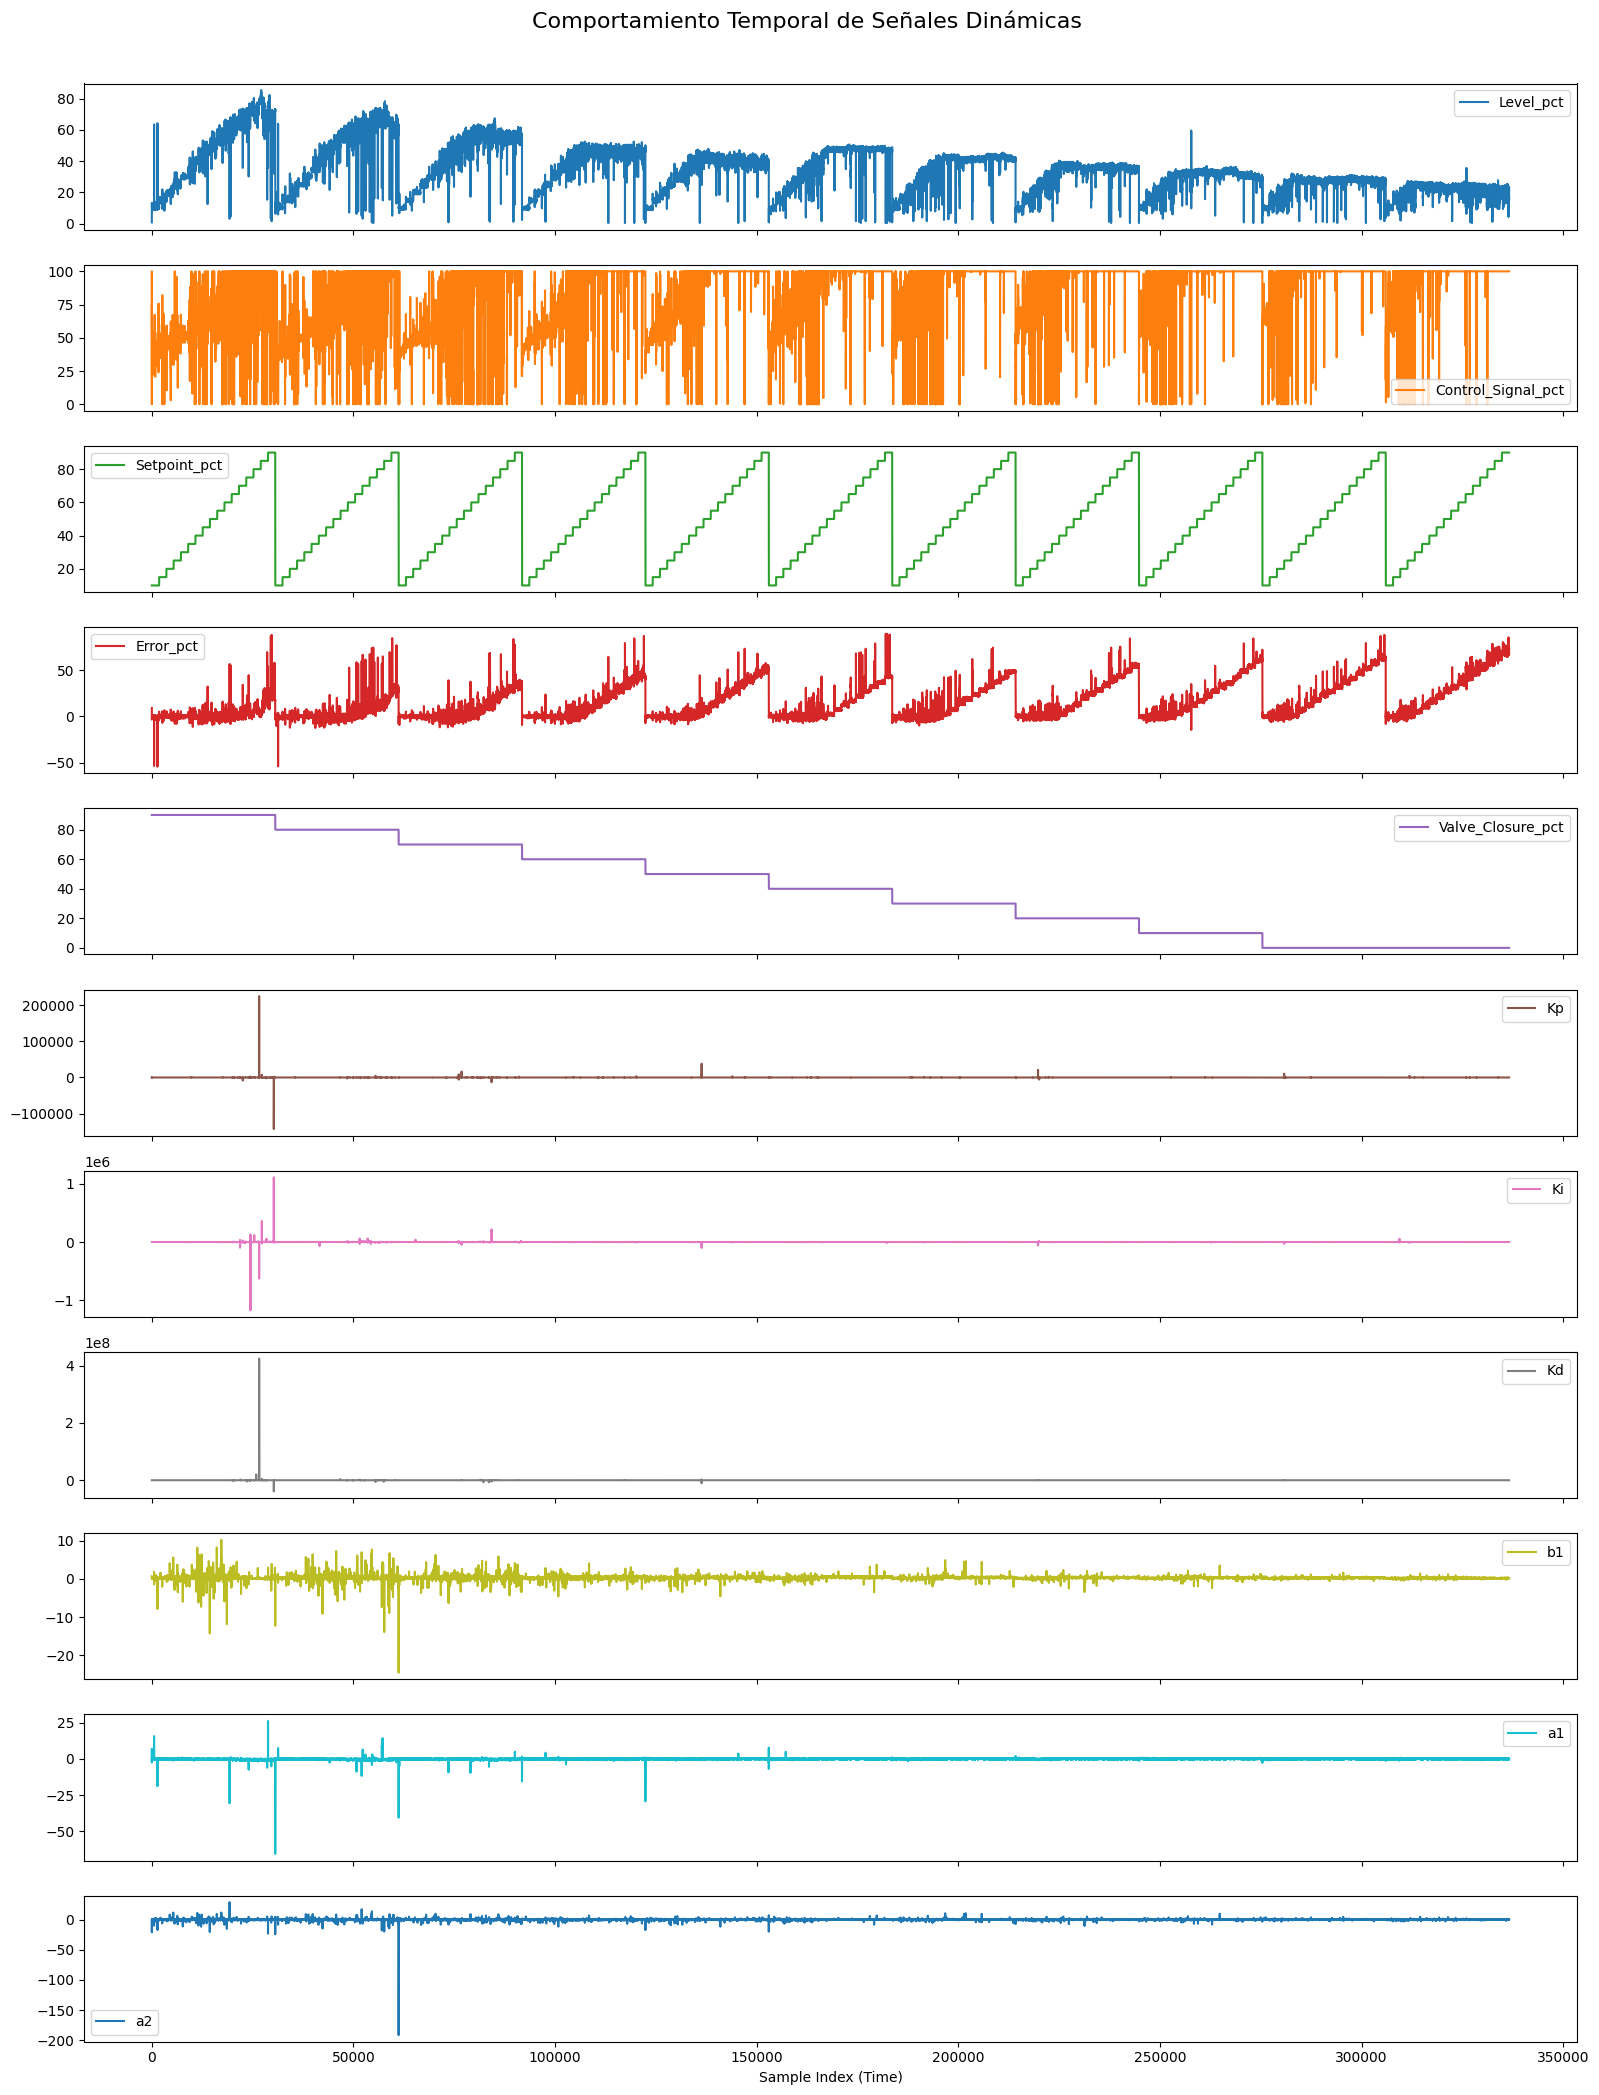

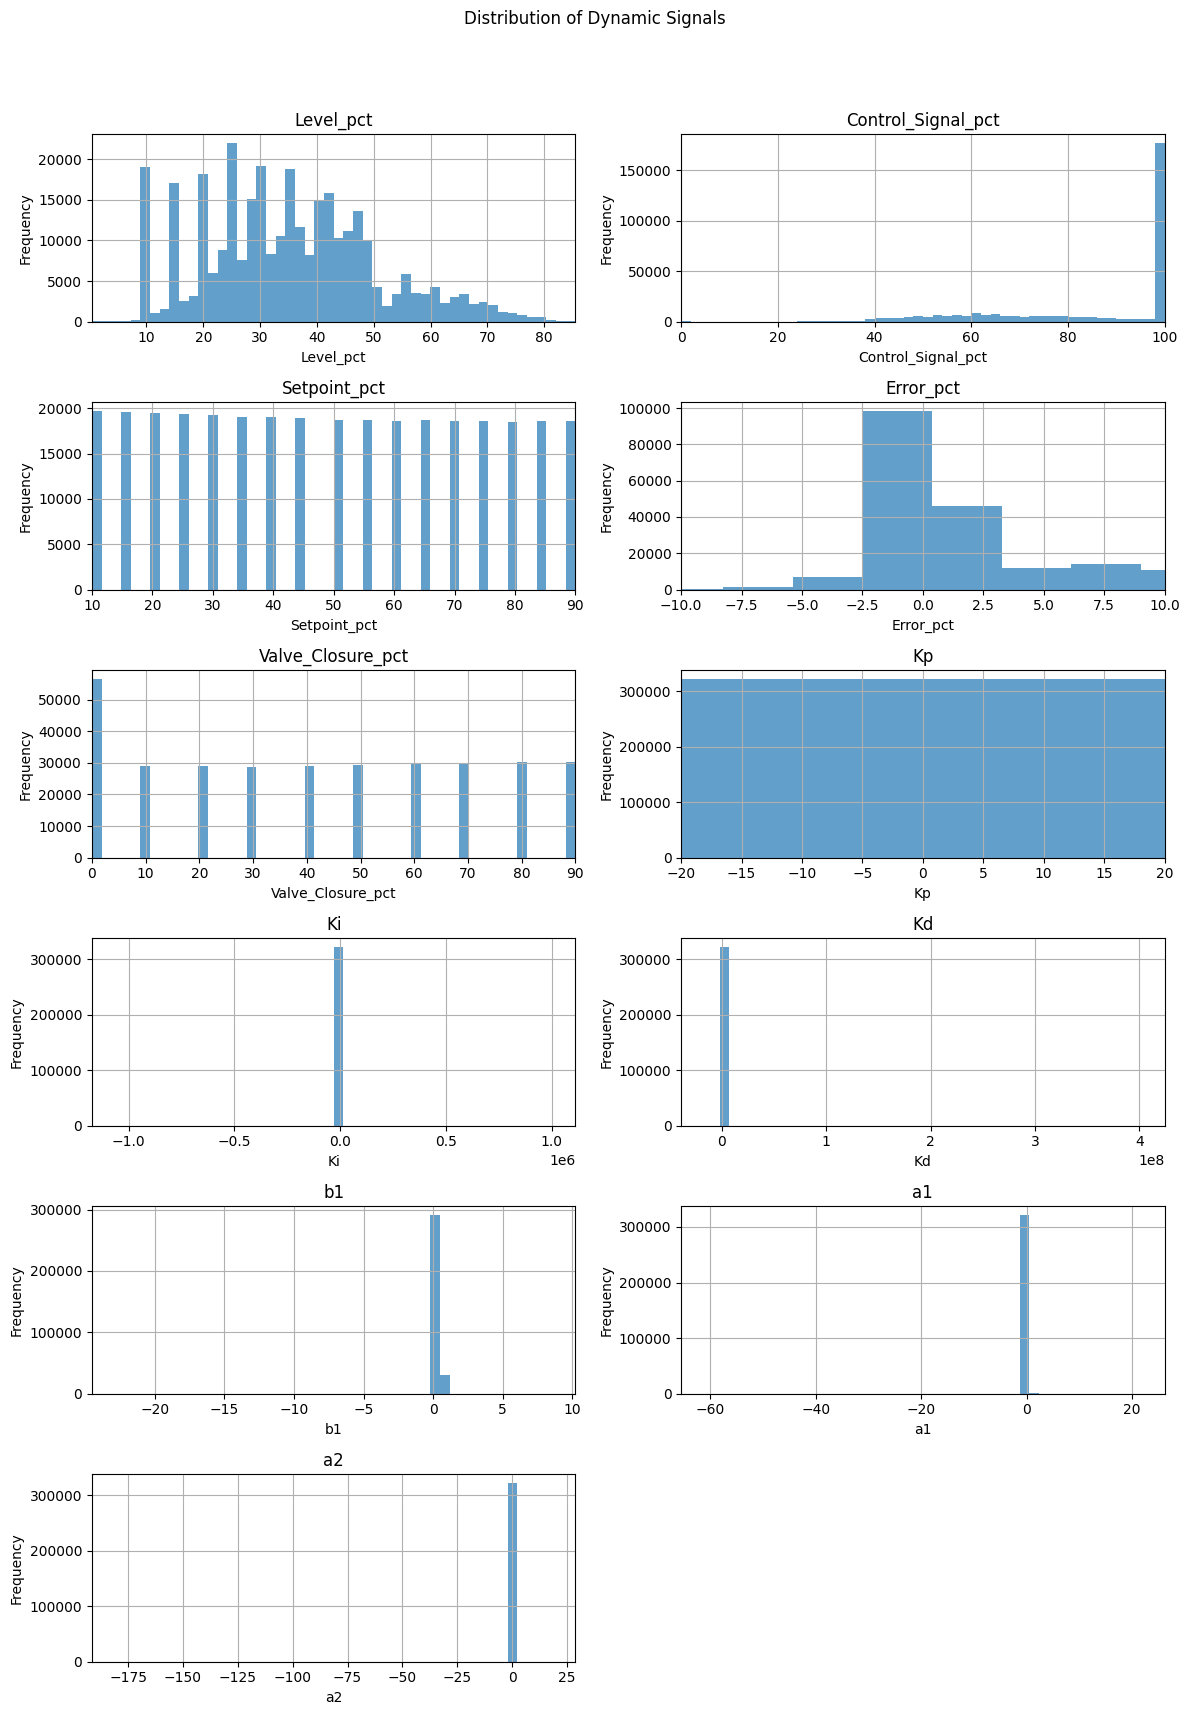

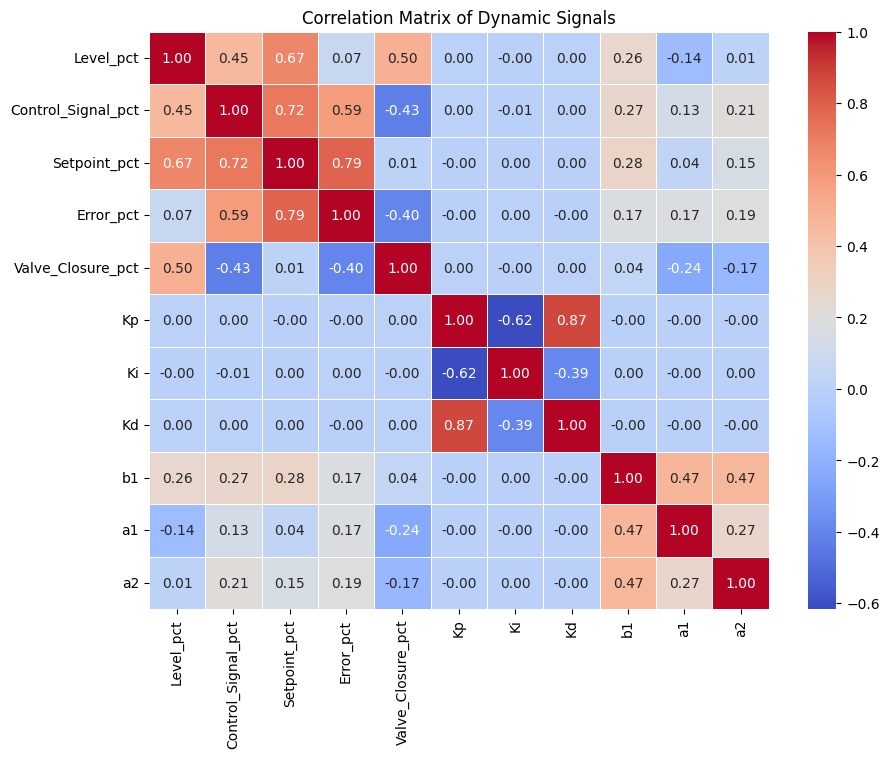

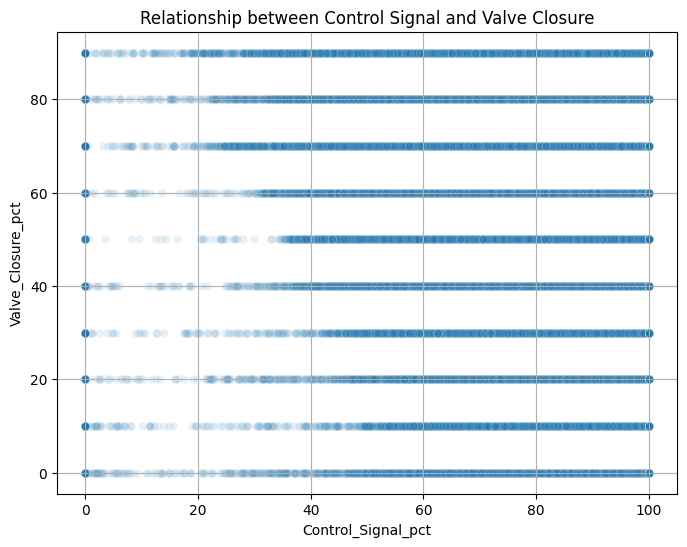

In [ ]:
output_dir = "EDA_Resultados"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Directory created: {output_dir}")
else:
    print(f"Results directory already exists: {output_dir}")
# Subtract 10 from 'Valve_Closure_pct' and ensure it is not negative (clip)
if 'Valve_Closure_pct' in data.columns:
    # Use clip(lower=0) to avoid negative values
    data['Valve_Closure_pct'] = (data['Valve_Closure_pct'] - 10).clip(lower=0)
else:
    print("Warning: Column 'Valve_Closure_pct' not found to subtract 10.")


# --- 2. Definition of Features and Preparation ---
print("--- 1. Feature Definition ---")
# All variables are treated as dynamic
dynamic_features = [
    'Level_pct', 'Control_Signal_pct', 'Setpoint_pct', 'Error_pct', 
    'Valve_Closure_pct', 'Kp', 'Ki', 'Kd', 'b1', 'a1', 'a2'
]

# Filter the list to include only columns that do exist in the DataFrame
available_features = [col for col in dynamic_features if col in data.columns]
missing_features = [col for col in dynamic_features if col not in data.columns]

if missing_features:
    print(f"Warning: The following columns were not found and will be ignored: {missing_features}")

# Ensure dynamic features are numeric
data[available_features] = data[available_features].apply(pd.to_numeric, errors='coerce')


# --- 3. Redirect Text Output ---
# Everything printed from here on will go to the file 'eda_report.txt'
output_txt_file = os.path.join(output_dir, 'eda_report.txt')
original_stdout = sys.stdout  # Save the original standard output

try:
    with open(output_txt_file, 'w', encoding='utf-8') as f:
        sys.stdout = f  # Redirect stdout to the file

        print("--- EXPLORATORY DATA ANALYSIS (EDA) REPORT ---")
        print(f"Generation date: {pd.Timestamp.now()}")
        print(f"Results directory: {os.path.abspath(output_dir)}")
        print("="*50)
        
        print(f"\nColumns analyzed as dynamic: {available_features}")
        if missing_features:
            print(f"Ignored columns (not found): {missing_features}")

        # --- 2. Data Quality and Statistics Analysis ---
        print("\n--- 2. Data Quality (Nulls) ---")
        print("Null value count per column:")
        print(data.isnull().sum())

        print("\n--- Descriptive Statistics (Dynamic Signals) ---")
        # .to_string() ensures the full DataFrame is printed
        print(data[available_features].describe().to_string())

        # --- 5. Dynamic Signal Analysis (The "Process") ---
        print("\n--- 5. Dynamic Signal Analysis ---")
        
        # --- 5.1. Behavior over Time ---
        img_path_1 = os.path.join(output_dir, 'eda_plot_01_time_behavior.png')
        print(f"Plotting temporal behavior... -> '{img_path_1}'")
        try:
            plot_layout = (len(available_features), 1)
            # Adjust height: 2 inches per subplot, minimum 12
            fig_height = max(12, len(available_features) * 2) 
            
            axes = data.plot(y=available_features, 
                           subplots=True, 
                           figsize=(16, fig_height),
                           layout=plot_layout,
                           title='Behavior of Dynamic Signals')
            
            # Flatten the axes to access the last one
            flat_axes = axes.flatten()
            flat_axes[-1].set_xlabel('Sample Index (Time)')
            
            plt.suptitle('Temporal Behavior of Dynamic Signals', fontsize=16)
            plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjust for the suptitle
            plt.savefig(img_path_1, bbox_inches='tight')
            #plt.close() # Close the figure to free memory
            print("Figure 1 saved.")
        except Exception as e:
            print(f"Error saving Figure 1 (Behavior): {e}")


        # --- 5.2. Distributions ---
        img_path_2 = os.path.join(output_dir, 'eda_plot_02_distributions.png')
        print(f"Plotting distributions... -> '{img_path_2}'")
        try:
            # 2-column layout: calculate required number of rows
            n_cols = 2
            n_rows = (len(available_features) + 1) // 2  # round up
            fig_height = max(10, n_rows * 3)  # 3 inches per row
            
            axes = data[available_features].hist(bins=50, figsize=(12, fig_height), alpha=0.7, layout=(n_rows, n_cols))
            
            # Adjust x-axis limits to the data range for each subplot and add labels in English
            flat_axes = axes.flatten()
            for i, col in enumerate(available_features):
                if i < len(flat_axes):
                    col_data = data[col].dropna()
                    flat_axes[i].set_xlabel(col)
                    flat_axes[i].set_ylabel('Frequency')
                    if col == 'Error_pct':
                        flat_axes[i].set_xlim(-10, 10)
                    elif col == 'Kp':
                        flat_axes[i].set_xlim(-20, 20)
                    elif len(col_data) > 0:
                        flat_axes[i].set_xlim(col_data.min(), col_data.max())
            
            plt.suptitle('Distribution of Dynamic Signals')
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.savefig(img_path_2, bbox_inches='tight')
            #plt.close()
            print("Figure 2 saved.")
        except Exception as e:
            print(f"Error saving Figure 2 (Distributions): {e}")

        # --- 5.3. Correlation Matrix ---
        img_path_3 = os.path.join(output_dir, 'eda_plot_03_correlation_matrix.png')
        print(f"Calculating correlation matrix... -> '{img_path_3}'")
        try:
            # Adjust size based on number of features
            fig_size = max(10, len(available_features) * 0.8) 
            plt.figure(figsize=(fig_size, fig_size * 0.75))
            
            corr_matrix = data[available_features].corr()
            sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
            plt.title('Correlation Matrix of Dynamic Signals')
            plt.savefig(img_path_3, bbox_inches='tight')
            #plt.close()
            print("Figure 3 saved.")
        except Exception as e:
            print(f"Error saving Figure 3 (Correlation): {e}")

        # --- 6. (HIGHLY RECOMMENDED) Coherence Checks ---
        print("\n--- 6. Coherence Checks ---")

        # --- 6.1. Is 'Error_pct' (Setpoint - Level)? ---
        if 'Error_pct' in data.columns and 'Setpoint_pct' in data.columns and 'Level_pct' in data.columns:
            data['Calculated_Error'] = data['Setpoint_pct'] - data['Level_pct']
            error_diff = (data['Error_pct'] - data['Calculated_Error']).abs().sum()
            
            if error_diff < 1e-5: # Use tolerance for floating-point errors
                print("Coherence (6.1): 'Error_pct' IS (Setpoint_pct - Level_pct). Good!")
            else:
                print("Attention (6.1)! 'Error_pct' does NOT match (Setpoint_pct - Level_pct).")
                print(f"Sum of absolute difference: {error_diff}")
                
                img_path_4 = os.path.join(output_dir, 'eda_plot_04_error_difference.png')
                print(f"Plotting error difference... -> '{img_path_4}'")
                try:
                    plt.figure(figsize=(12, 3))
                    (data['Error_pct'] - data['Calculated_Error']).plot(title='Difference between Error_pct and (SP - LV)')
                    plt.ylabel("Difference")
                    plt.xlabel("Sample Index")
                    plt.grid(True)
                    plt.savefig(img_path_4, bbox_inches='tight')
                    #plt.close()
                    print("Figure 4 (Error Diff) saved.")
                except Exception as e:
                    print(f"Error saving Figure 4 (Error Diff): {e}")
            
            # Clean up temporary column
            data = data.drop(columns=['Calculated_Error'])
        else:
            print("Could not perform coherence check 6.1 (missing columns).")


        # --- 6.2. How are Control_Signal_pct and Valve_Closure_pct related? ---
        if 'Control_Signal_pct' in data.columns and 'Valve_Closure_pct' in data.columns:
            img_path_5 = os.path.join(output_dir, 'eda_plot_05_control_vs_valve.png')
            print(f"Plotting Control vs Valve relationship... -> '{img_path_5}'")
            try:
                plt.figure(figsize=(8, 6))
                sns.scatterplot(data=data, x='Control_Signal_pct', y='Valve_Closure_pct', alpha=0.1)
                plt.title('Relationship between Control Signal and Valve Closure')
                plt.grid(True)
                plt.savefig(img_path_5, bbox_inches='tight')
                #plt.close()
                print("Figure 5 (Control vs Valve) saved.")
            except Exception as e:
                print(f"Error saving Figure 5 (Control vs Valve): {e}")
        else:
            print("Could not perform coherence check 6.2 (missing columns).")

        print("\n--- END OF EDA REPORT ---")

finally:
    # Restore original standard output to see the final prints
    sys.stdout = original_stdout

print(f"\nEDA analysis completed!")
print(f"Results saved in: {os.path.abspath(output_dir)}")
print(f"Text report: {output_txt_file}")